<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Rain_Australia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
sns.set()

# Rain in Australia dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


* Dataset's dimensions:

In [4]:
f'Number of rows: {data.shape[0]}.'

'Number of rows: 145460.'

In [5]:
f'Number of columns: {data.shape[1]}.'

'Number of columns: 23.'

* Dataset's infos:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data's description

## From Kaggle

Link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.

Context

Predict next-day rain by training classification models on the target variable RainTomorrow.

Content

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.



## Columns meanings

From: http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

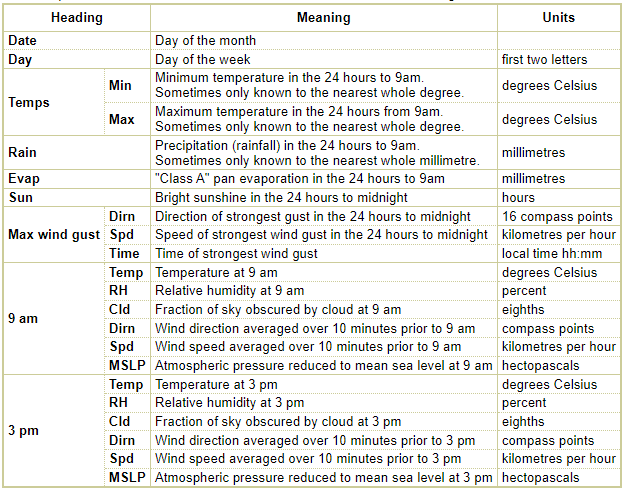

# Data analysis

## Descriptive analysis

In [7]:
data.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


## Column `Location`

In [8]:
f'There are {data["Location"].nunique()} different locations'

'There are 49 different locations'

The most shown locations are:

In [9]:
most_locations = data['Location'].value_counts()[:20]

In [10]:
fig = px.bar(
    x= most_locations.keys(), 
    y= most_locations.values, 
    title= 'The 20 most shown locations',
    labels= {'x': 'Locations', 'y': 'Count'}
)
fig.update_layout(width= 800, height= 800, title= {'x': 0.5})
fig.show()

## Column `MinTemp`

Some descriptive statistics:

In [11]:
data['MinTemp'].describe().round(2)

count    143975.00
mean         12.19
std           6.40
min          -8.50
25%           7.60
50%          12.00
75%          16.90
max          33.90
Name: MinTemp, dtype: float64

* Average `MinTemp` related to `RainTomorrow`:

In [12]:
data.groupby('RainTomorrow')['MinTemp'].mean().round(2)

RainTomorrow
No     11.90
Yes    13.19
Name: MinTemp, dtype: float64

* Graph analysis:

In [13]:
from plotly.subplots import make_subplots

In [14]:
most_min_locations = data.groupby('Location')['MinTemp'].mean().round(2).sort_values()

In [15]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with lower MinTemp', 'Locations with higher MinTemp'])

fig.add_trace(
    go.Bar(x= most_min_locations.keys()[:10], y= most_min_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_min_locations.keys()[-10:], y= most_min_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'MinTemp (°C)', range= [0, 25], row= 1, col= 1)
fig.update_yaxes(title_text= 'MinTemp (°C)', row= 1, col= 2)

It's possible to observe that the minimum temperature on days with rain tends to be higher.

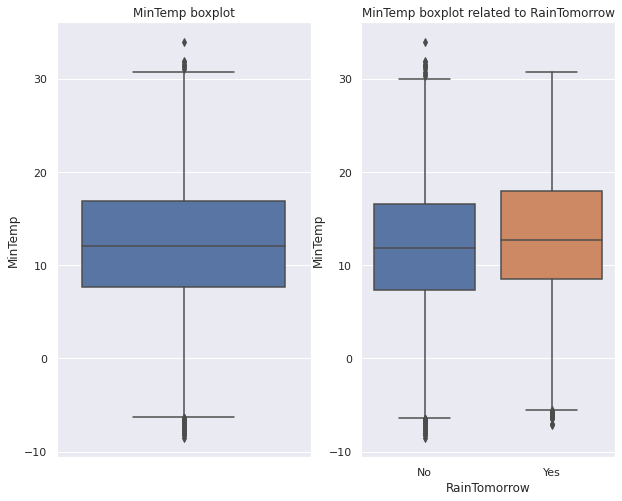

In [16]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'MinTemp', ax= axes[0])
ax1.set_title('MinTemp boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'MinTemp', ax= axes[1])
ax2.set_title('MinTemp boxplot related to RainTomorrow')
plt.show()

Split data in two datasets:

In [17]:
rain_yes = data.query('RainTomorrow == "Yes"')
rain_no = data.query('RainTomorrow == "No"')

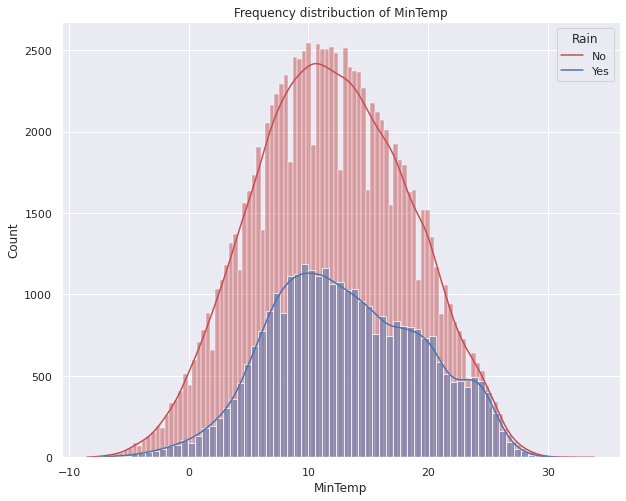

In [18]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'MinTemp', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'MinTemp', color= 'b', kde= True)
plt.title('Frequency distribuction of MinTemp')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.show()

## Column `MaxTemp`

Some descriptive statistics:

In [19]:
data['MaxTemp'].describe()

count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

* Average `MaxTemp` related to `RainTomorrow`:

In [20]:
data.groupby('RainTomorrow')['MaxTemp'].mean().round(2)

RainTomorrow
No     23.84
Yes    21.12
Name: MaxTemp, dtype: float64

* Graph analysis

In [21]:
most_max_locations = data.groupby('Location')['MaxTemp'].mean().round(2).sort_values(ascending= False)

In [22]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with higher MaxTemp', 'Locations with lower MaxTemp'])

fig.add_trace(
    go.Bar(x= most_max_locations.keys()[:10], y= most_max_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_max_locations.keys()[-10:], y= most_max_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'MaxTemp (°C)', row= 1, col= 1)
fig.update_yaxes(title_text= 'MaxTemp (°C)', range= [0, 35], row= 1, col= 2)

Days with rain tend to have less maximum temperature.

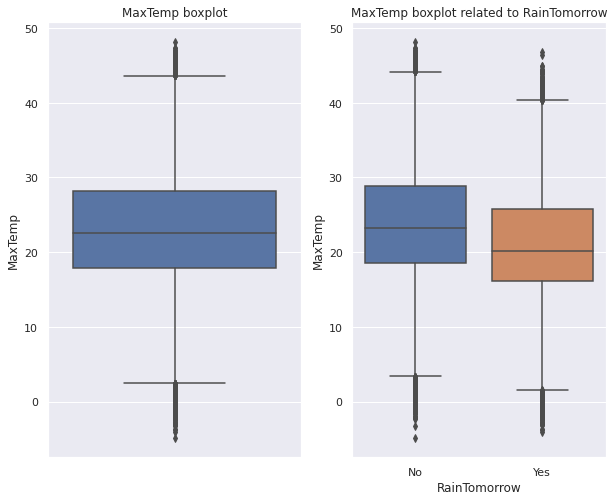

In [23]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'MaxTemp', ax= axes[0])
ax1.set_title('MaxTemp boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'MaxTemp', ax= axes[1])
ax2.set_title('MaxTemp boxplot related to RainTomorrow')
plt.show()

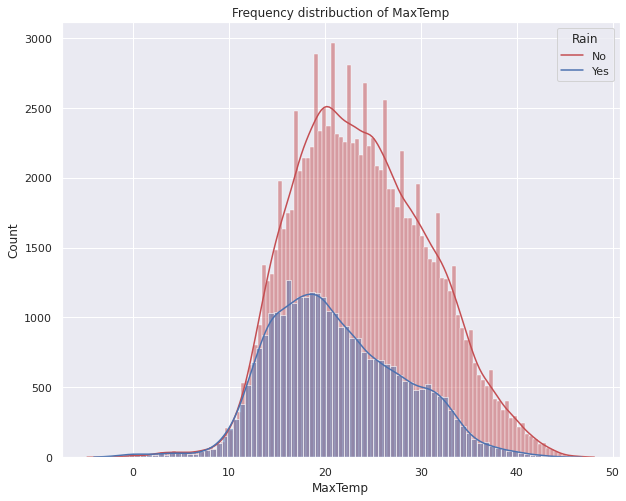

In [24]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'MaxTemp', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'MaxTemp', color= 'b', kde= True)
plt.title('Frequency distribuction of MaxTemp')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.show()

## Column `Rainfall`

Some descriptive statistics:

In [25]:
data['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

* Most and less rainfall locations:

In [26]:
most_rain_locations = data.groupby('Location')['Rainfall'].mean().round(2).sort_values(ascending= False)

In [27]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Most rainfall locations', 'Less rainfall locations'])

fig.add_trace(
    go.Bar(x= most_rain_locations.keys()[:10], y= most_rain_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_rain_locations.keys()[-10:], y= most_rain_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'Rainfall (mm)', row= 1, col= 1)
fig.update_yaxes(title_text= 'Rainfall (mm)', range= [0, 6], row= 1, col= 2)

* Graph analysis

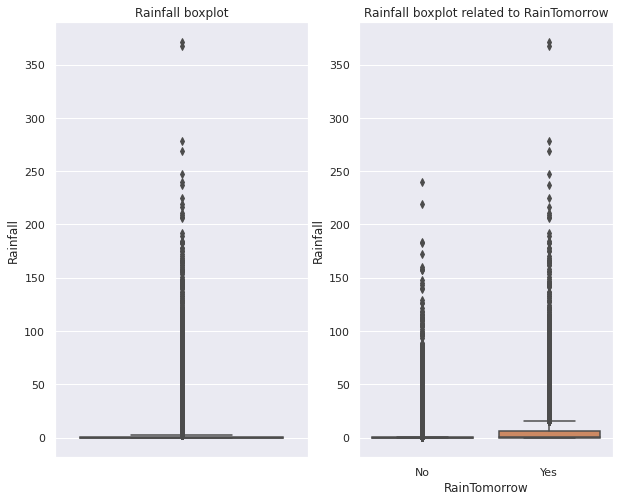

In [28]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'Rainfall', ax= axes[0])
ax1.set_title('Rainfall boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'Rainfall', ax= axes[1])
ax2.set_title('Rainfall boxplot related to RainTomorrow')
plt.show()

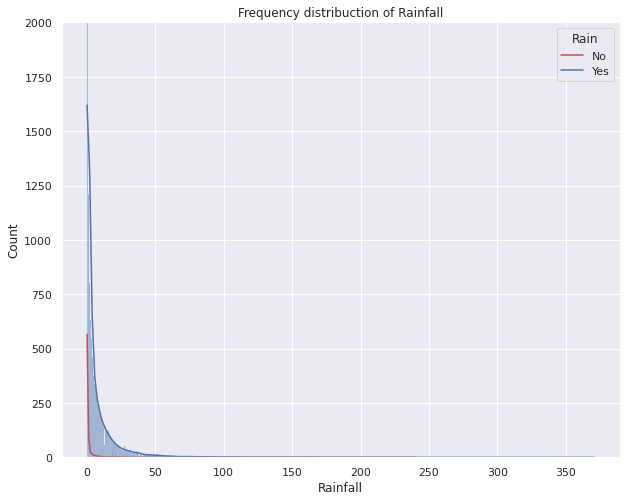

In [29]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'Rainfall', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'Rainfall', color= 'b', kde= True)
plt.title('Frequency distribuction of Rainfall')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.ylim([0, 2000])
plt.show()

## Column `Evaporation`

In [30]:
data['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

* Average `Evaporation` related to `RainTomorrow`:

In [31]:
data.groupby('RainTomorrow')['Evaporation'].mean().round(2)

RainTomorrow
No     5.73
Yes    4.53
Name: Evaporation, dtype: float64

* Graph analysis:

In [32]:
data_except_evaporation_null = data.loc[~data['Evaporation'].isna()] # select data except null values in Evaporation column
most_evaporation_locations = data_except_evaporation_null.groupby('Location')['Evaporation'].mean().sort_values(ascending= False)

In [33]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with more evaporation', 'Locations with less evaporation'])

fig.add_trace(
    go.Bar(x= most_evaporation_locations.keys()[:10], y= most_evaporation_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_evaporation_locations.keys()[-10:], y= most_evaporation_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'Evaporation (mm)', row= 1, col= 1)
fig.update_yaxes(title_text= 'Evaporation (mm)', range= [0, 10], row= 1, col= 2)

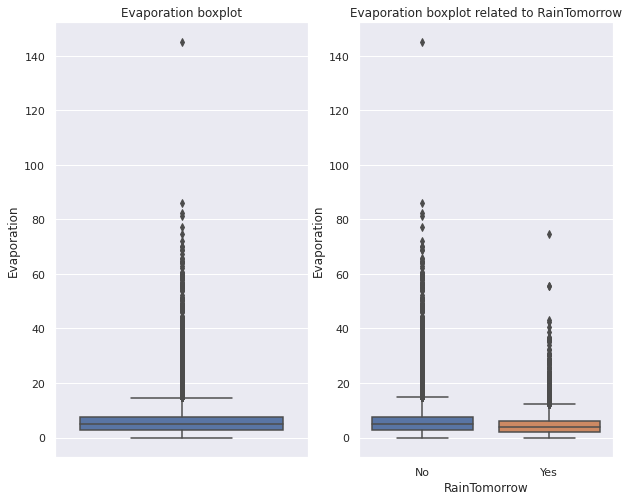

In [34]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'Evaporation', ax= axes[0])
ax1.set_title('Evaporation boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'Evaporation', ax= axes[1])
ax2.set_title('Evaporation boxplot related to RainTomorrow')
plt.show()

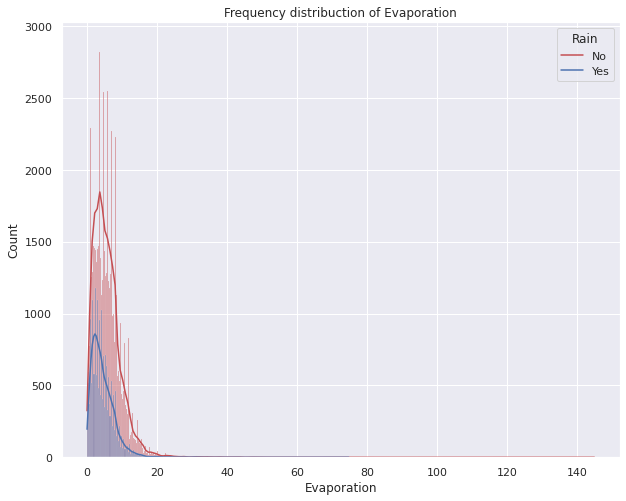

In [35]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'Evaporation', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'Evaporation', color= 'b', kde= True)
plt.title('Frequency distribuction of Evaporation')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.show()

## Column `Sunshine`

Some descriptive statistics:

In [36]:
data['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

* Average `Sunshine` related to `RainTomorrow`:

In [37]:
data.groupby('RainTomorrow')['Sunshine'].mean().round(2)

RainTomorrow
No     8.55
Yes    4.47
Name: Sunshine, dtype: float64

* Graph analysis:

In [38]:
sunshine_locations_no_nan = data.loc[~data['Sunshine'].isna()]
most_sunshine_locations = sunshine_locations_no_nan.groupby('Location')['Sunshine'].mean().sort_values(ascending= False)

In [39]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with more sunshine', 'Locations with less sunshine'])

fig.add_trace(
    go.Bar(x= most_sunshine_locations.keys()[:10], y= most_sunshine_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_sunshine_locations.keys()[-10:], y= most_sunshine_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'Sunshine (h)', row= 1, col= 1)
fig.update_yaxes(title_text= 'Sunshine (h)', range= [0, 10], row= 1, col= 2)

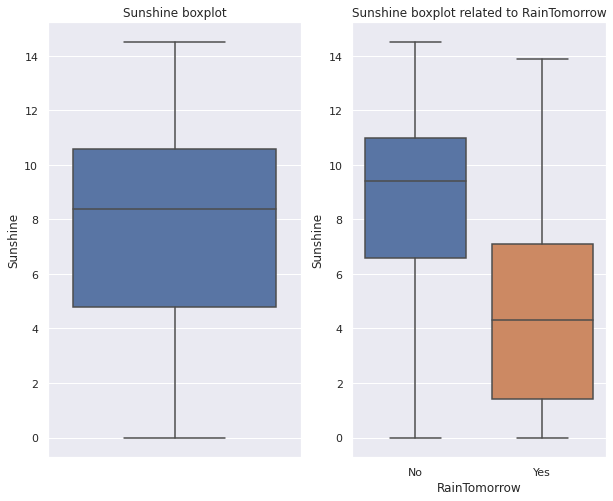

In [40]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'Sunshine', ax= axes[0])
ax1.set_title('Sunshine boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'Sunshine', ax= axes[1])
ax2.set_title('Sunshine boxplot related to RainTomorrow')
plt.show()

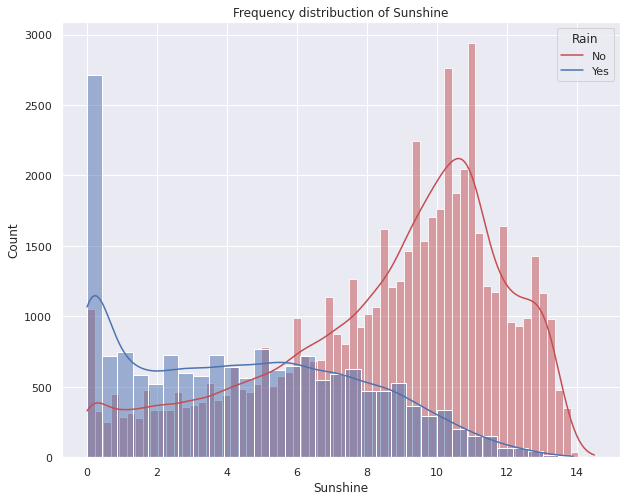

In [41]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'Sunshine', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'Sunshine', color= 'b', kde= True)
plt.title('Frequency distribuction of Sunshine')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.show()

## Columns `WindGustDir` and `WindGustSpeed` 

Some descriptive statistics (`WindGustSpeed` only):

In [42]:
data['WindGustSpeed'].describe()

count    135197.000000
mean         40.035230
std          13.607062
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

* `WindGustDir` count:

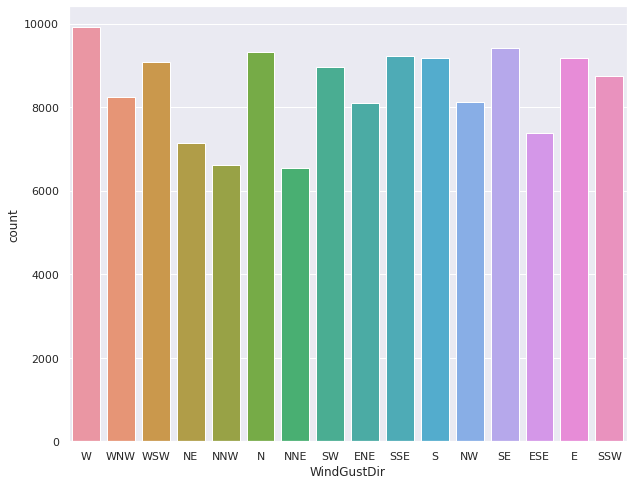

In [43]:
plt.figure(figsize= (10, 8))
sns.countplot(data= data, x= 'WindGustDir')
plt.show()

* Graph analysis:

In [44]:
windgustspeed_no_na = data.loc[~data['WindGustSpeed'].isna()]
most_gustspeed_locations = windgustspeed_no_na.groupby('Location')['WindGustSpeed'].mean().round(2).sort_values(ascending= False)

In [45]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with more intense wind gust speed', 'Locations with less intense wind gust speed'])

fig.add_trace(
    go.Bar(x= most_gustspeed_locations.keys()[:10], y= most_gustspeed_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_gustspeed_locations.keys()[-10:], y= most_gustspeed_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'Speed (km/h)', row= 1, col= 1)
fig.update_yaxes(title_text= 'Speed (km/h)', range= [0, 50], row= 1, col= 2)

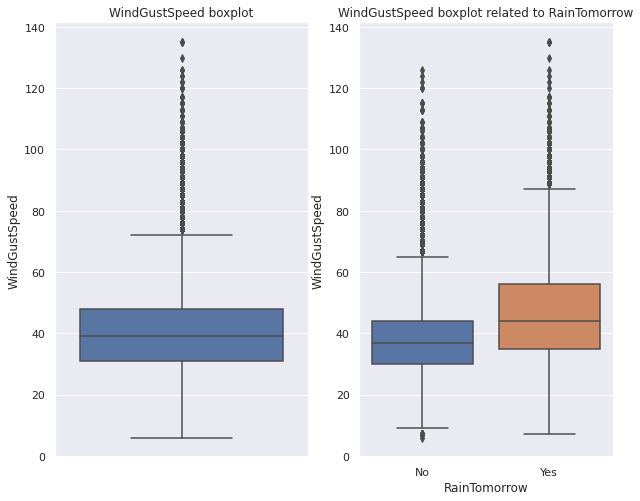

In [46]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'WindGustSpeed', ax= axes[0])
ax1.set_title('WindGustSpeed boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'WindGustSpeed', ax= axes[1])
ax2.set_title('WindGustSpeed boxplot related to RainTomorrow')
plt.show()

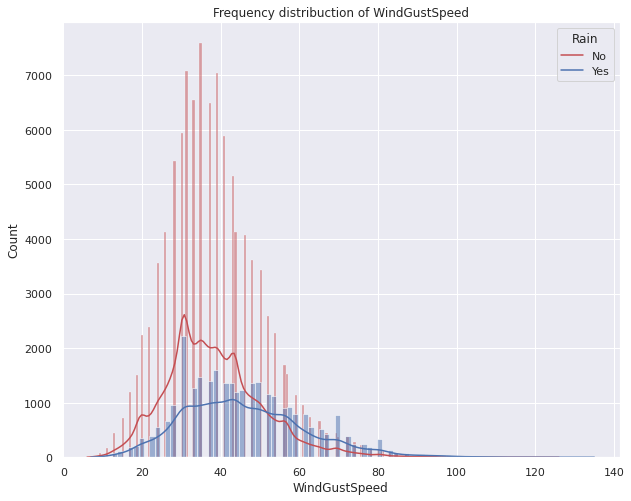

In [47]:
plt.figure(figsize= (10, 8))
sns.histplot(data= rain_no, x= 'WindGustSpeed', color= 'r', kde= True)
sns.histplot(data= rain_yes, x= 'WindGustSpeed', color= 'b', kde= True)
plt.title('Frequency distribuction of WindGustSpeed')
plt.legend(labels= ['No', 'Yes'], title= 'Rain')
plt.show()

## Frequency distribution of variables

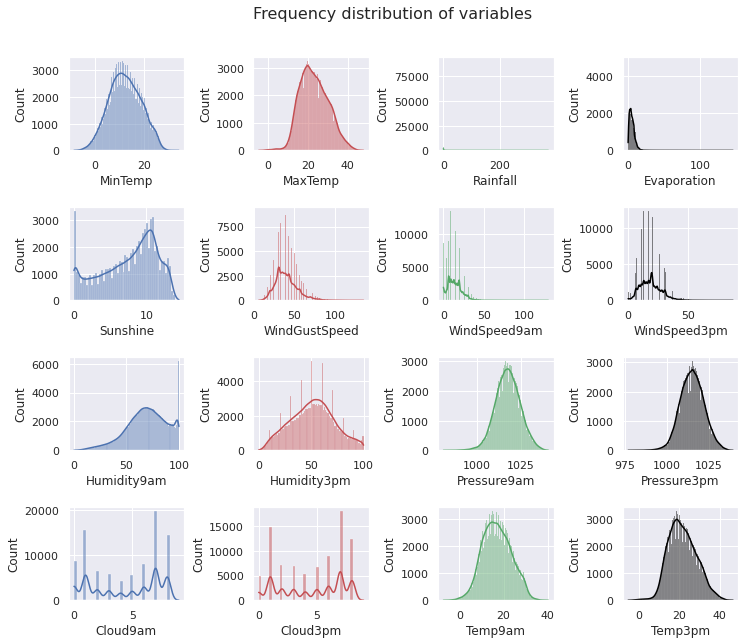

In [93]:
fig, axes = plt.subplots(4, 4, figsize= (12, 10))
plt.subplots_adjust(hspace= 0.6, wspace= 0.6)
plt.suptitle('Frequency distribution of variables', fontsize= 16, y= 0.95)
ax1 = sns.histplot(data= data, x= 'MinTemp', kde= True, color= 'b', ax= axes[0, 0])
# ax1.set_title('MinTemp')
ax2 = sns.histplot(data= data, x= 'MaxTemp', kde= True, color= 'r', ax= axes[0, 1])
# ax2.set_title('MaxTemp')
ax3 = sns.histplot(data= data, x= 'Rainfall', kde= True, color= 'g', ax= axes[0, 2])
# ax3.set_title('Rainfall')
ax4 = sns.histplot(data= data, x= 'Evaporation', kde= True, color= 'black', ax= axes[0, 3])
# ax4.set_title('Evaporation')
ax5 = sns.histplot(data= data, x= 'Sunshine', kde= True, color= 'b', ax= axes[1, 0])
# ax5.set_title('Sunshine')
ax6 = sns.histplot(data= data, x= 'WindGustSpeed', kde= True, color= 'r', ax= axes[1, 1])
# ax6.set_title('WindGustSpeed')
ax7 = sns.histplot(data= data, x= 'WindSpeed9am', kde= True, color= 'g', ax= axes[1, 2])
# ax7.set_title('WindSpeed9am')
ax8 = sns.histplot(data= data, x= 'WindSpeed3pm', kde= True, color= 'black', ax= axes[1, 3])
# ax8.set_title('WindSpeed3pm')
ax9 = sns.histplot(data= data, x= 'Humidity9am', kde= True, color= 'b', ax= axes[2, 0])
# ax9.set_title('Humidity9am')
ax10 = sns.histplot(data= data, x= 'Humidity3pm', kde= True, color= 'r', ax= axes[2, 1])
# ax10.set_title('Himidity3pm')
ax11 = sns.histplot(data= data, x= 'Pressure9am', kde= True, color= 'g', ax= axes[2, 2])
# ax11.set_title('Pressure9am')
ax12 = sns.histplot(data= data, x= 'Pressure3pm', kde= True, color= 'black', ax= axes[2, 3])
# ax12.set_title('Pressure3pm')
ax13 = sns.histplot(data= data, x= 'Cloud9am', kde= True, color= 'b', ax= axes[3, 0])
# ax13.set_title('Cloud9am')
ax14 = sns.histplot(data= data, x= 'Cloud3pm', kde= True, color= 'r', ax= axes[3, 1])
# ax14.set_title('Cloud3pm')
ax15 = sns.histplot(data= data, x= 'Temp9am', kde= True, color= 'g', ax= axes[3, 2])
# ax15.set_title('Temp9am')
ax16 = sns.histplot(data= data, x= 'Temp3pm', kde= True, color= 'black', ax= axes[3, 3])
# ax16.set_title('Temp3pm')
plt.show()

# Converting data from `RainToday` and `RainTomorrow` to numeric values

The target variable (`RainTomorrow`) and `RainToday` contains in your data only two values: Yes or No. To put it in machine learning model is needed to do a little treatment:

In [49]:
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})

In [50]:
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

No is converted to value 0 and Yes to 1 in both variables.

In [51]:
data['RainToday'].unique()

array([ 0.,  1., nan])

In [52]:
data['RainTomorrow'].unique()

array([ 0.,  1., nan])

# Dropping missing values in the target variable

In [53]:
data.dropna(subset= ['RainTomorrow'], inplace= True)
data.index = range(data.shape[0])
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0


# Setting new column `Year`

Setting new column with year information.

In [54]:
data['Date'] = pd.to_datetime(data['Date'])

In [55]:
data['Year'] = data['Date'].dt.year

# Correlation analysis

In [56]:
data.corr().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71,0.06,0.08,0.04
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.51,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98,-0.23,-0.16,0.06
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08,0.50,0.24,-0.01
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.51,-0.39,-0.27,-0.29,-0.19,-0.18,0.55,0.57,-0.19,-0.12,0.08
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.06,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49,-0.33,-0.45,0.01
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.60,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03,0.16,0.23,-0.03
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.60,1.00,0.52,-0.27,-0.03,-0.23,-0.17,0.02,0.05,0.13,0.01,0.10,0.09,-0.02
WindSpeed3pm,0.18,0.05,0.06,0.13,0.06,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.25,0.05,0.03,0.16,0.03,0.08,0.09,-0.03
Humidity9am,-0.23,-0.51,0.22,-0.51,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50,0.35,0.26,0.01
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56,0.38,0.45,-0.01


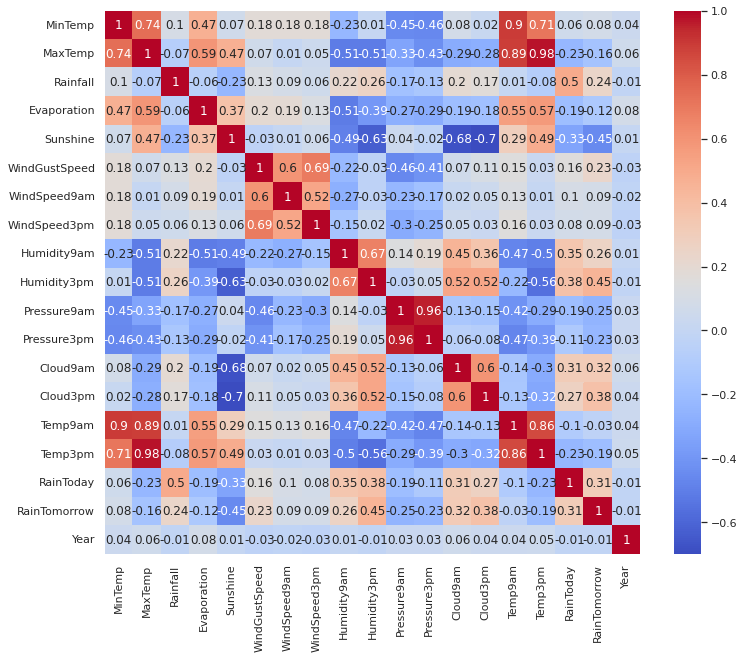

In [57]:
plt.figure(figsize= (12, 10))
sns.heatmap(data.corr().round(2), annot= True, cmap= 'coolwarm')

# Predictive model

## Independent (X) and dependent (y) variables

The target variable is `RainTomorrow`. All others variables are the independent variables.

## Splitting data in train and test

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = data.drop(['Date', 'Year', 'RainTomorrow'], axis= 1)

In [60]:
y = data['RainTomorrow']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# Data treatment

In [62]:
X_train.isna().sum()

Location             0
MinTemp            460
MaxTemp            235
Rainfall          1034
Evaporation      42685
Sunshine         47555
WindGustDir       6489
WindGustSpeed     6442
WindDir9am        7018
WindDir3pm        2634
WindSpeed9am       926
WindSpeed3pm      1833
Humidity9am       1231
Humidity3pm       2543
Pressure9am       9825
Pressure3pm       9802
Cloud9am         37698
Cloud3pm         40070
Temp9am            627
Temp3pm           1921
RainToday         1034
dtype: int64

In [63]:
X_test.isna().sum()

Location             0
MinTemp            177
MaxTemp             87
Rainfall           372
Evaporation      18158
Sunshine         20261
WindGustDir       2841
WindGustSpeed     2828
WindDir9am        2995
WindDir3pm        1144
WindSpeed9am       422
WindSpeed3pm       797
Humidity9am        543
Humidity3pm       1067
Pressure9am       4189
Pressure3pm       4179
Cloud9am         15959
Cloud3pm         17024
Temp9am            277
Temp3pm            805
RainToday          372
dtype: int64

In [64]:
for column in X_train.columns:
  try:
    X_train[column].fillna(data[column].median(), inplace= True)
    X_test[column].fillna(data[column].median(), inplace= True)
  except:
    X_train[column].fillna(data[column].mode()[0], inplace= True)
    X_test[column].fillna(data[column].mode()[0], inplace= True)

## Encoding

In [65]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from category_encoders import TargetEncoder

In [67]:
te = TargetEncoder(cols= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



In [68]:
X_train = te.fit_transform(X_train, y_train)

In [69]:
X_test = te.transform(X_test)


## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression(random_state= 1, max_iter= 1000, penalty= 'l2', tol= 0.000001, C= 4, solver= 'liblinear')

### Model training

In [72]:
lr.fit(X_train, y_train)

LogisticRegression(C=4, max_iter=1000, random_state=1, solver='liblinear',
                   tol=1e-06)

### Predict data from test dataset

In [73]:
y_predict = lr.predict(X_test)

### Parameters of the model

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
f'Accuracy: {round(accuracy_score(y_test, y_predict) * 100, 2)}%'

'Accuracy: 84.19%'

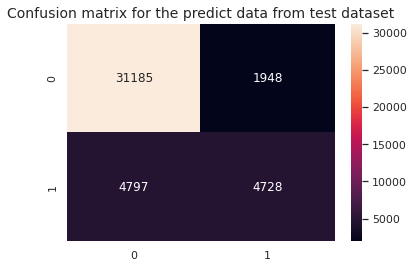

In [76]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt= 'g')
plt.title('Confusion matrix for the predict data from test dataset', fontsize= 14)
plt.show()

In [77]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     33133
         1.0       0.71      0.50      0.58      9525

    accuracy                           0.84     42658
   macro avg       0.79      0.72      0.74     42658
weighted avg       0.83      0.84      0.83     42658



### Predict data from train dataset

In [78]:
y_predict_train = lr.predict(X_train)

### Parameters of the model (train dataset)

In [79]:
f'Accuracy: {round(accuracy_score(y_train, y_predict_train) * 100, 2)}%'

'Accuracy: 84.35%'

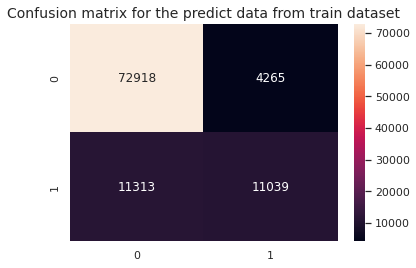

In [80]:
sns.heatmap(confusion_matrix(y_train, y_predict_train), annot= True, fmt= 'g')
plt.title('Confusion matrix for the predict data from train dataset', fontsize= 14)
plt.show()

In [81]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     77183
         1.0       0.72      0.49      0.59     22352

    accuracy                           0.84     99535
   macro avg       0.79      0.72      0.74     99535
weighted avg       0.83      0.84      0.83     99535



## Cross validation

In [82]:
from sklearn.model_selection import KFold, cross_val_score

In [83]:
kfold = KFold(n_splits= 30, shuffle= True, random_state= 42)

In [84]:
model = LogisticRegression(random_state= 1, max_iter= 1000, penalty= 'l2', tol= 0.000001, C= 4, solver= 'liblinear')

In [85]:
result = cross_val_score(model, X_train, y_train, cv= kfold)

In [87]:
f'Cross validation average result: {round(result.mean() * 100, 2)}%'

'Cross validation average result: 84.35%'